Video penjelasan no 1 dan 2: https://youtu.be/ijN9fc4HVtE

In [ ]:
#import library
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
import zipfile

archive_zip = '/content/Data A.zip'
extract_zip = zipfile.ZipFile(archive_zip, 'r')
extract_zip.extractall('/content')
extract_zip.close()

In [ ]:
test = '/content/Data/test'
train = '/content/Data/train'
valid = '/content/Data/valid'

In [ ]:
data_generator = ImageDataGenerator(
    rescale = 1.0 / 255,
    rotation_range = 40,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

train_generator = data_generator.flow_from_directory(
    train,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)
test_generator = data_generator.flow_from_directory(
    train,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)


validation_generator = data_generator.flow_from_directory(
    valid,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 2800 images belonging to 2 classes.
Found 2800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
data_generator = ImageDataGenerator(
    rescale = 1.0 / 255,
    rotation_range = 40,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

train_generator = data_generator.flow_from_directory(
    train,
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical'
)
test_generator = data_generator.flow_from_directory(
    train,
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical'
)


validation_generator = data_generator.flow_from_directory(
    valid,
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical'
)

Found 2800 images belonging to 2 classes.
Found 2800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
num_classes = 2

model = keras.Sequential([
    layers.Conv2D(96, (11, 11), activation='relu', padding='valid', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((3, 3), strides=(4, 4)),

    layers.Conv2D(256, (5, 5), activation='relu', padding='same'),
    layers.MaxPooling2D((3, 3), strides=(2, 2)),
    layers.ZeroPadding2D(padding=2),

    layers.Conv2D(364, (3, 3), activation='relu'),
    layers.ZeroPadding2D(padding=1),

    layers.Conv2D(364, (3, 3), activation='relu'),
    layers.ZeroPadding2D(padding=1),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3), strides=(2, 2)),
    layers.ZeroPadding2D(padding=1),

    layers.Flatten(),
    layers.Dense(4096, activation='relu'),

    layers.Dense(4096, activation='relu'),

    layers.Dense(num_classes, activation='sigmoid')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model_result = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
22/22 [==============================] - 92s 3s/step - loss: 3.9858 - accuracy: 0.5018 - val_loss: 0.6835 - val_accuracy: 0.5650
Epoch 2/10
22/22 [==============================] - 50s 2s/step - loss: 0.6151 - accuracy: 0.6793 - val_loss: 0.6097 - val_accuracy: 0.6400
Epoch 3/10
22/22 [==============================] - 54s 2s/step - loss: 0.5424 - accuracy: 0.7204 - val_loss: 0.6155 - val_accuracy: 0.7050
Epoch 4/10
22/22 [==============================] - 52s 2s/step - loss: 0.5124 - accuracy: 0.7475 - val_loss: 0.6023 - val_accuracy: 0.6650
Epoch 5/10
22/22 [==============================] - 52s 2s/step - loss: 0.4965 - accuracy: 0.7514 - val_loss: 0.5847 - val_accuracy: 0.7000
Epoch 6/10
22/22 [==============================] - 45s 2s/step - loss: 0.4789 - accuracy: 0.7571 - val_loss: 0.6037 - val_accuracy: 0.6850
Epoch 7/10
22/22 [==============================] - 45s 2s/step - loss: 0.4634 - accuracy: 0.7632 - val_loss: 0.6692 - val_accuracy: 0.7100
Epoch 8/10
22/22 [==

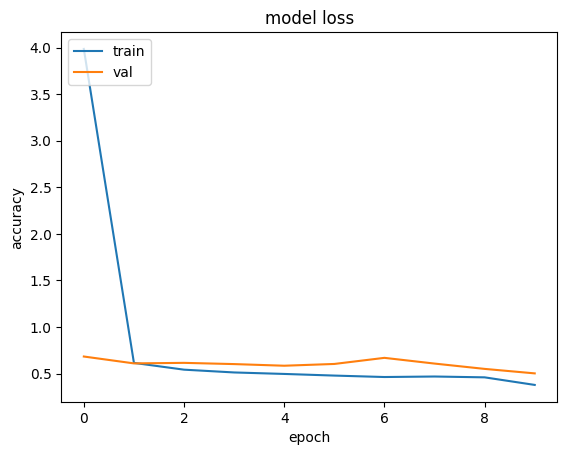

In [ ]:
plt.plot(model_result.history['loss'])
plt.plot(model_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
num_classes = 2

model2 = keras.Sequential([
    layers.Conv2D(96, (11, 11), activation='relu', padding='valid', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((3, 3), strides=(4, 4)),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Conv2D(256, (5, 5), activation='relu', padding='same'),
    layers.ZeroPadding2D(padding=2),
    layers.MaxPooling2D((3, 3), strides=(2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Conv2D(364, (3, 3), activation='relu'),
    layers.ZeroPadding2D(padding=1),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Conv2D(364, (3, 3), activation='relu'),
    layers.ZeroPadding2D(padding=1),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.ZeroPadding2D(padding=1),
    layers.MaxPooling2D((3, 3), strides=(2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(num_classes, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model2_result = model2.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
22/22 [==============================] - 66s 2s/step - loss: 3.3264 - accuracy: 0.6989 - val_loss: 3805.2178 - val_accuracy: 0.5000
Epoch 2/10
22/22 [==============================] - 48s 2s/step - loss: 0.7586 - accuracy: 0.7989 - val_loss: 620.4214 - val_accuracy: 0.5000
Epoch 3/10
22/22 [==============================] - 47s 2s/step - loss: 0.4330 - accuracy: 0.8564 - val_loss: 137.3299 - val_accuracy: 0.4950
Epoch 4/10
22/22 [==============================] - 47s 2s/step - loss: 0.3708 - accuracy: 0.8771 - val_loss: 28.4477 - val_accuracy: 0.5200
Epoch 5/10
22/22 [==============================] - 56s 3s/step - loss: 0.3307 - accuracy: 0.8971 - val_loss: 14.0541 - val_accuracy: 0.6050
Epoch 6/10
22/22 [==============================] - 48s 2s/step - loss: 0.2645 - accuracy: 0.9100 - val_loss: 6.1059 - val_accuracy: 0.6100
Epoch 7/10
22/22 [==============================] - 46s 2s/step - loss: 0.2123 - accuracy: 0.9264 - val_loss: 3.6397 - val_accuracy: 0.6400
Epoch 8/10


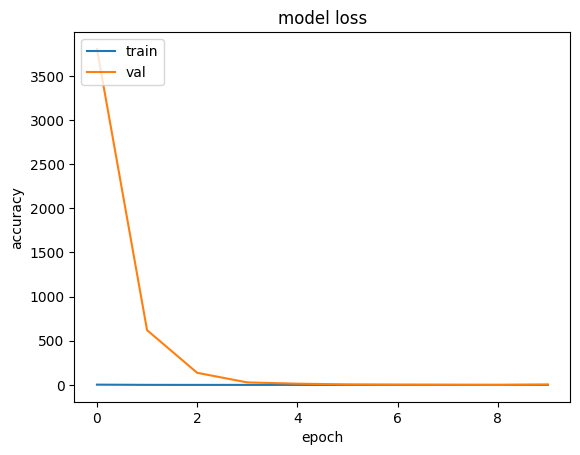

In [ ]:
plt.plot(model2_result.history['loss'])
plt.plot(model2_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test_images, test_labels = next(test_generator)

evaluation = model2.evaluate(test_images, test_labels)


predictions = model2.predict(test_images)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(test_labels, axis=1)

from sklearn.metrics import confusion_matrix, classification_report

print("\nClassification Report:")
print(classification_report(y_true, y_pred))



4/4 [==============================] - 0s 61ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.56      0.71        61
           1       0.71      0.99      0.83        67

    accuracy                           0.78       128
   macro avg       0.84      0.77      0.77       128
weighted avg       0.83      0.78      0.77       128



4/4 [==============================] - 0s 86ms/step


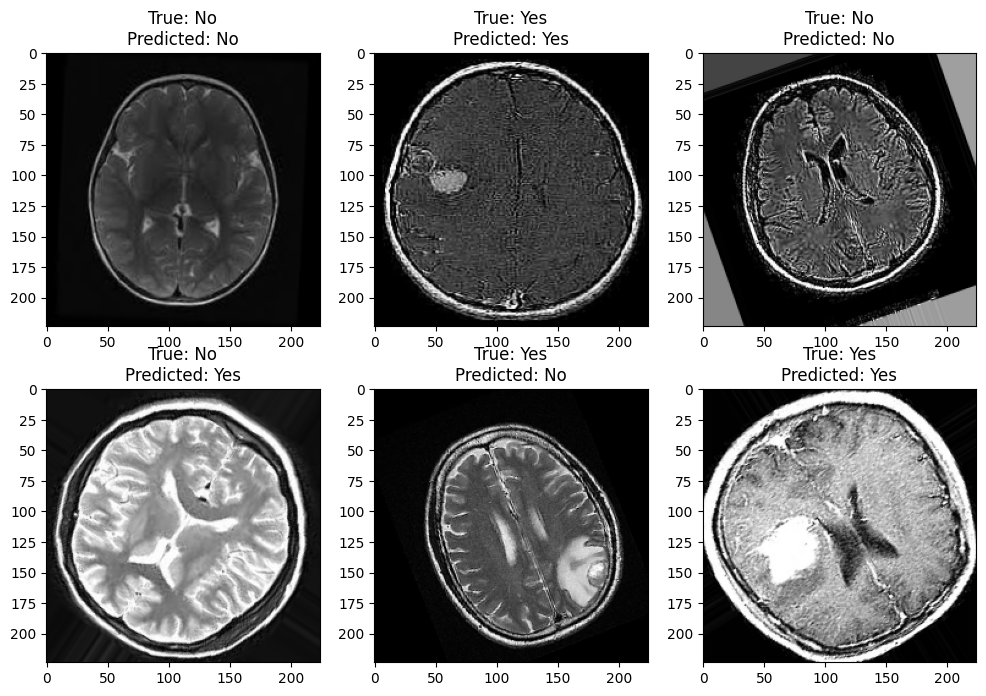

In [ ]:
predicted_labels = model.predict(test_images)

plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(test_images[i])
    true_label = "No" if test_labels[i,0] == 1 else "Yes"
    predicted_label = "No" if predicted_labels[i,0] > 0.5 else "Yes"
    plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
plt.show()